- Nama  : DEDDY SETIAWAN
- NIM  : 202010370311407


In [ ]:
# Library
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load Data

In [ ]:
# untuk bisa mengakses file yang di dalam drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# untuk mencari lokasi projek
folder_path = '/content/drive/MyDrive/Analisis Big Data/1. Tugas Data OULAD'
os.chdir(folder_path)
!pwd

/content/drive/MyDrive/Analisis Big Data/1. Tugas Data OULAD


# **Preprocessing**

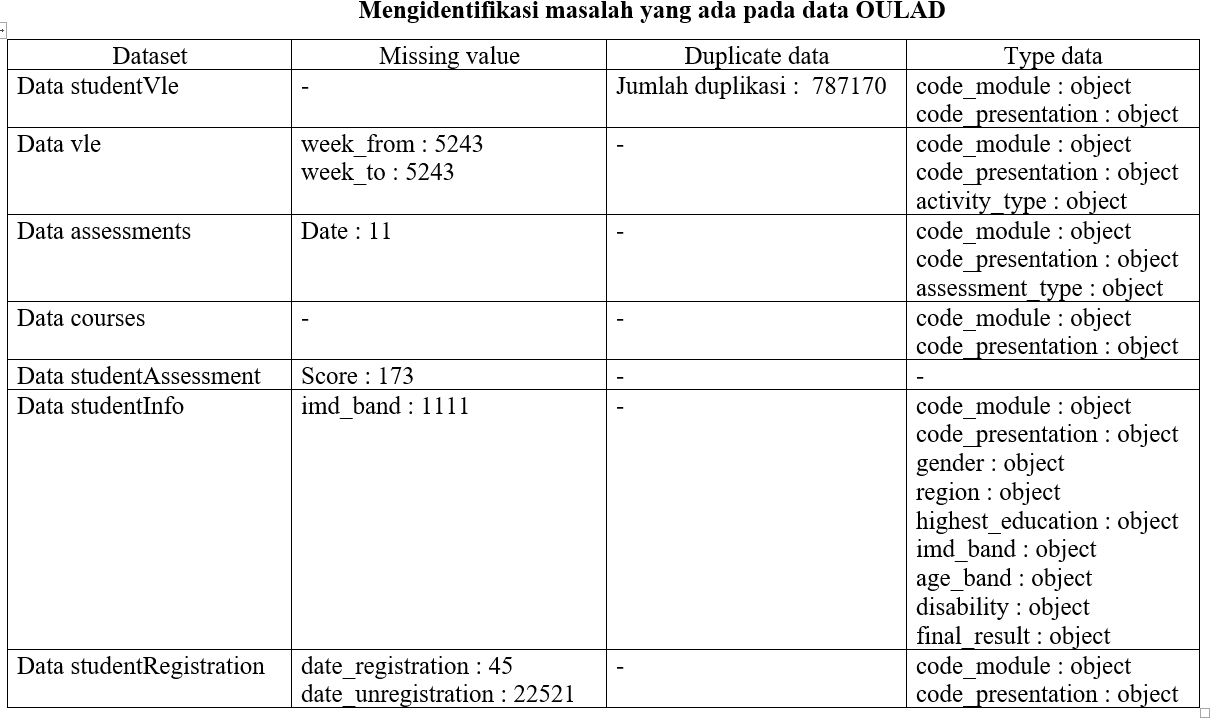

In [ ]:
# Membuat variabel dataset
dataset_1 = pd.read_csv('Data/studentVle.csv')
dataset_2 = pd.read_csv('Data/vle.csv')
dataset_3 = pd.read_csv('Data/assessments.csv')
dataset_4 = pd.read_csv('Data/courses.csv')
dataset_5 = pd.read_csv('Data/studentAssessment.csv')
dataset_6 = pd.read_csv('Data/studentInfo.csv')
dataset_7 = pd.read_csv('Data/studentRegistration.csv')

1. Handling Missing Values

In [ ]:
# Data vle
dataset_2['week_from'].fillna(dataset_2['week_from'].mean(), inplace=True)
dataset_2['week_to'].fillna(dataset_2['week_to'].mean(), inplace=True)

dataset_2.isnull().sum()

id_site              0
code_module          0
code_presentation    0
activity_type        0
week_from            0
week_to              0
dtype: int64

In [ ]:
# Data assessments
dataset_3['date'].fillna(dataset_3['date'].mean(), inplace=True)

dataset_3.isnull().sum()

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64

In [ ]:
# Data studentAssessment
dataset_5['score'].fillna(dataset_5['score'].mean(), inplace=True)

dataset_5.isnull().sum()

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

In [ ]:
# Data studentInfo
for col in dataset_6.columns:
    mode_value = dataset_6[col].mode()[0]
    dataset_6[col].fillna(mode_value, inplace=True)
print(dataset_6.isnull().sum())

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64


In [ ]:
# Data studentRegistration
dataset_7['date_registration'].fillna(dataset_7['date_registration'].mean(), inplace=True)
dataset_7['date_unregistration'].fillna(dataset_7['date_unregistration'].mean(), inplace=True)

dataset_7.isnull().sum()

code_module            0
code_presentation      0
id_student             0
date_registration      0
date_unregistration    0
dtype: int64

2. Handling Data duplicate

In [ ]:
# Menghapus data duplikat pada Data studentVle
dataset_1.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", dataset_1.duplicated().sum())

Jumlah duplikasi:  0


3. Handling Type data Menggunakan LabelEncoder

In [ ]:
# Data studentVle
label_encoder = LabelEncoder()
dataset_1['code_module'] = label_encoder.fit_transform(dataset_1['code_module'])
dataset_1['code_presentation'] = label_encoder.fit_transform(dataset_1['code_presentation'])

# Tampilkan hasil encoding
print(dataset_1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9868110 entries, 0 to 10655278
Data columns (total 6 columns):
 #   Column             Dtype
---  ------             -----
 0   code_module        int64
 1   code_presentation  int64
 2   id_student         int64
 3   id_site            int64
 4   date               int64
 5   sum_click          int64
dtypes: int64(6)
memory usage: 527.0 MB
None


In [ ]:
# Data vle
label_encoder = LabelEncoder()
dataset_2['code_module'] = label_encoder.fit_transform(dataset_2['code_module'])
dataset_2['code_presentation'] = label_encoder.fit_transform(dataset_2['code_presentation'])
dataset_2['activity_type'] = label_encoder.fit_transform(dataset_2['activity_type'])

print(dataset_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   int64  
 2   code_presentation  6364 non-null   int64  
 3   activity_type      6364 non-null   int64  
 4   week_from          6364 non-null   float64
 5   week_to            6364 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 298.4 KB
None


In [ ]:
# Data assessments
label_encoder = LabelEncoder()
dataset_3['code_module'] = label_encoder.fit_transform(dataset_3['code_module'])
dataset_3['code_presentation'] = label_encoder.fit_transform(dataset_3['code_presentation'])
dataset_3['assessment_type'] = label_encoder.fit_transform(dataset_3['assessment_type'])

print(dataset_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    int64  
 1   code_presentation  206 non-null    int64  
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    int64  
 4   date               206 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 9.8 KB
None


In [ ]:
# Data courses
label_encoder = LabelEncoder()
dataset_4['code_module'] = label_encoder.fit_transform(dataset_4['code_module'])
dataset_4['code_presentation'] = label_encoder.fit_transform(dataset_4['code_presentation'])

print(dataset_4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   code_module                 22 non-null     int64
 1   code_presentation           22 non-null     int64
 2   module_presentation_length  22 non-null     int64
dtypes: int64(3)
memory usage: 656.0 bytes
None


In [ ]:
# Data studentInfo
label_encoder = LabelEncoder()
dataset_6['code_module'] = label_encoder.fit_transform(dataset_6['code_module'])
dataset_6['code_presentation'] = label_encoder.fit_transform(dataset_6['code_presentation'])
dataset_6['gender'] = label_encoder.fit_transform(dataset_6['gender'])
dataset_6['region'] = label_encoder.fit_transform(dataset_6['region'])
dataset_6['highest_education'] = label_encoder.fit_transform(dataset_6['highest_education'])
dataset_6['imd_band'] = label_encoder.fit_transform(dataset_6['imd_band'])
dataset_6['age_band'] = label_encoder.fit_transform(dataset_6['age_band'])
dataset_6['disability'] = label_encoder.fit_transform(dataset_6['disability'])
dataset_6['final_result'] = label_encoder.fit_transform(dataset_6['final_result'])

print(dataset_6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   code_module           32593 non-null  int64
 1   code_presentation     32593 non-null  int64
 2   id_student            32593 non-null  int64
 3   gender                32593 non-null  int64
 4   region                32593 non-null  int64
 5   highest_education     32593 non-null  int64
 6   imd_band              32593 non-null  int64
 7   age_band              32593 non-null  int64
 8   num_of_prev_attempts  32593 non-null  int64
 9   studied_credits       32593 non-null  int64
 10  disability            32593 non-null  int64
 11  final_result          32593 non-null  int64
dtypes: int64(12)
memory usage: 3.0 MB
None


In [ ]:
# Data studentRegistration
label_encoder = LabelEncoder()
dataset_7['code_module'] = label_encoder.fit_transform(dataset_7['code_module'])
dataset_7['code_presentation'] = label_encoder.fit_transform(dataset_7['code_presentation'])

print(dataset_7.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  int64  
 1   code_presentation    32593 non-null  int64  
 2   id_student           32593 non-null  int64  
 3   date_registration    32593 non-null  float64
 4   date_unregistration  32593 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 1.2 MB
None


4. Normalisasi menggunakan Min-Max Scaling

In [ ]:
# Data studentVle
dataset_1['code_module'] = MinMaxScaler().fit_transform(dataset_1[['code_module']])
dataset_1['code_presentation'] = MinMaxScaler().fit_transform(dataset_1[['code_presentation']])
dataset_1['id_student'] = MinMaxScaler().fit_transform(dataset_1[['id_student']])
dataset_1['id_site'] = MinMaxScaler().fit_transform(dataset_1[['id_site']])
dataset_1['date'] = MinMaxScaler().fit_transform(dataset_1[['date']])
dataset_1['sum_click'] = MinMaxScaler().fit_transform(dataset_1[['sum_click']])

dataset_1.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,0.0,0.333333,0.008129,0.038121,0.05102,0.000430
1,0.0,0.333333,0.008129,0.038121,0.05102,0.000000
3,0.0,0.333333,0.008129,0.038048,0.05102,0.001433
4,0.0,0.333333,0.008129,0.038239,0.05102,0.000000
5,0.0,0.333333,0.008129,0.038121,0.05102,0.001003


In [ ]:
# Data vle
dataset_2['id_site'] = MinMaxScaler().fit_transform(dataset_2[['id_site']])
dataset_2['code_module'] = MinMaxScaler().fit_transform(dataset_2[['code_module']])
dataset_2['code_presentation'] = MinMaxScaler().fit_transform(dataset_2[['code_presentation']])
dataset_2['activity_type'] = MinMaxScaler().fit_transform(dataset_2[['activity_type']])
dataset_2['week_from'] = MinMaxScaler().fit_transform(dataset_2[['week_from']])
dataset_2['week_to'] = MinMaxScaler().fit_transform(dataset_2[['week_to']])

dataset_2.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,0.036688,0.0,0.333333,0.842105,0.524286,0.524655
1,0.036269,0.0,0.333333,0.473684,0.524286,0.524655
2,0.036788,0.0,0.333333,0.842105,0.524286,0.524655
3,0.036589,0.0,0.333333,1.000000,0.524286,0.524655
4,0.036855,0.0,0.333333,0.842105,0.524286,0.524655


In [ ]:
# Data assessments
dataset_3['code_module'] = MinMaxScaler().fit_transform(dataset_3[['code_module']])
dataset_3['code_presentation'] = MinMaxScaler().fit_transform(dataset_3[['code_presentation']])
dataset_3['id_assessment'] = MinMaxScaler().fit_transform(dataset_3[['id_assessment']])
dataset_3['assessment_type'] = MinMaxScaler().fit_transform(dataset_3[['assessment_type']])
dataset_3['date'] = MinMaxScaler().fit_transform(dataset_3[['date']])
dataset_3['weight'] = MinMaxScaler().fit_transform(dataset_3[['weight']])

dataset_3.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,0.0,0.333333,0.000000,1.0,0.028112,0.1
1,0.0,0.333333,0.000026,1.0,0.168675,0.2
2,0.0,0.333333,0.000052,1.0,0.421687,0.2
3,0.0,0.333333,0.000078,1.0,0.618474,0.2
4,0.0,0.333333,0.000104,1.0,0.815261,0.3


In [ ]:
# Data courses
dataset_4['code_module'] = MinMaxScaler().fit_transform(dataset_4[['code_module']])
dataset_4['code_presentation'] = MinMaxScaler().fit_transform(dataset_4[['code_presentation']])
dataset_4['module_presentation_length'] = MinMaxScaler().fit_transform(dataset_4[['module_presentation_length']])

dataset_4.head()

,code_module,code_presentation,module_presentation_length
0,0.000000,0.333333,0.971429
1,0.000000,1.000000,1.000000
2,0.166667,0.333333,0.971429
3,0.166667,1.000000,0.800000
4,0.166667,0.000000,0.171429


In [ ]:
# Data studentAssessment
dataset_5['id_assessment'] = MinMaxScaler().fit_transform(dataset_5[['id_assessment']])
dataset_5['id_student'] = MinMaxScaler().fit_transform(dataset_5[['id_student']])
dataset_5['date_submitted'] = MinMaxScaler().fit_transform(dataset_5[['date_submitted']])
dataset_5['is_banked'] = MinMaxScaler().fit_transform(dataset_5[['is_banked']])
dataset_5['score'] = MinMaxScaler().fit_transform(dataset_5[['score']])

dataset_5.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,0.0,0.001811,0.046850,0.0,0.78
1,0.0,0.008129,0.053312,0.0,0.70
2,0.0,0.009319,0.045234,0.0,0.72
3,0.0,0.009795,0.059774,0.0,0.69
4,0.0,0.011715,0.048465,0.0,0.79


In [ ]:
# Data studentInfo
dataset_6['code_module'] = MinMaxScaler().fit_transform(dataset_6[['code_module']])
dataset_6['code_presentation'] = MinMaxScaler().fit_transform(dataset_6[['code_presentation']])
dataset_6['id_student'] = MinMaxScaler().fit_transform(dataset_6[['id_student']])
dataset_6['gender'] = MinMaxScaler().fit_transform(dataset_6[['gender']])
dataset_6['region'] = MinMaxScaler().fit_transform(dataset_6[['region']])
dataset_6['highest_education'] = MinMaxScaler().fit_transform(dataset_6[['highest_education']])
dataset_6['imd_band'] = MinMaxScaler().fit_transform(dataset_6[['imd_band']])
dataset_6['age_band'] = MinMaxScaler().fit_transform(dataset_6[['age_band']])
dataset_6['num_of_prev_attempts'] = MinMaxScaler().fit_transform(dataset_6[['num_of_prev_attempts']])
dataset_6['studied_credits'] = MinMaxScaler().fit_transform(dataset_6[['studied_credits']])
dataset_6['disability'] = MinMaxScaler().fit_transform(dataset_6[['disability']])
dataset_6['final_result'] = MinMaxScaler().fit_transform(dataset_6[['final_result']])

dataset_6.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,0.0,0.333333,0.002823,1.0,0.000000,0.25,1.000000,1.0,0.0,0.336,0.0,0.666667
1,0.0,0.333333,0.009092,0.0,0.500000,0.25,0.222222,0.5,0.0,0.048,0.0,0.666667
2,0.0,0.333333,0.009780,0.0,0.416667,0.00,0.333333,0.5,0.0,0.048,1.0,1.000000
3,0.0,0.333333,0.010273,0.0,0.583333,0.00,0.555556,0.5,0.0,0.048,0.0,0.666667
4,0.0,0.333333,0.010745,0.0,0.916667,0.50,0.555556,0.0,0.0,0.048,0.0,0.666667


In [ ]:
# Data studentRegistration
dataset_7['code_module'] = MinMaxScaler().fit_transform(dataset_7[['code_module']])
dataset_7['code_presentation'] = MinMaxScaler().fit_transform(dataset_7[['code_presentation']])
dataset_7['id_student'] = MinMaxScaler().fit_transform(dataset_7[['id_student']])
dataset_7['date_registration'] = MinMaxScaler().fit_transform(dataset_7[['date_registration']])
dataset_7['date_unregistration'] = MinMaxScaler().fit_transform(dataset_7[['date_unregistration']])

dataset_7.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,0.0,0.333333,0.002823,0.333333,0.512679
1,0.0,0.333333,0.009092,0.550102,0.512679
2,0.0,0.333333,0.009780,0.470348,0.466007
3,0.0,0.333333,0.010273,0.552147,0.512679
4,0.0,0.333333,0.010745,0.298569,0.512679


5. Data Integration

*   dataset_2 = Data vle
*   dataset_3 = Data assessments
*   dataset_4 = Data courses
*   dataset_5 = Data studentAssessment

In [ ]:
merged_data = pd.merge(dataset_2, dataset_3, on='code_module')
merged_data = pd.merge(merged_data, dataset_4, on='code_module')
merged_data = pd.merge(merged_data, dataset_5, on='id_assessment')

merged_data.to_csv('integrated_dataset.csv', index=False)

# Data Visualization

In [ ]:
merged_data.head()

,id_site,code_module,code_presentation_x,activity_type,week_from,week_to,code_presentation_y,id_assessment,assessment_type,date,weight,code_presentation,module_presentation_length,id_student,date_submitted,is_banked,score
0,0.036688,0.0,0.333333,0.842105,0.524286,0.524655,0.333333,0.0,1.0,0.028112,0.1,0.333333,0.971429,0.001811,0.046850,0.0,0.78
1,0.036688,0.0,0.333333,0.842105,0.524286,0.524655,0.333333,0.0,1.0,0.028112,0.1,0.333333,0.971429,0.008129,0.053312,0.0,0.70
2,0.036688,0.0,0.333333,0.842105,0.524286,0.524655,0.333333,0.0,1.0,0.028112,0.1,0.333333,0.971429,0.009319,0.045234,0.0,0.72
3,0.036688,0.0,0.333333,0.842105,0.524286,0.524655,0.333333,0.0,1.0,0.028112,0.1,0.333333,0.971429,0.009795,0.059774,0.0,0.69
4,0.036688,0.0,0.333333,0.842105,0.524286,0.524655,0.333333,0.0,1.0,0.028112,0.1,0.333333,0.971429,0.011715,0.048465,0.0,0.79


Bar Charts

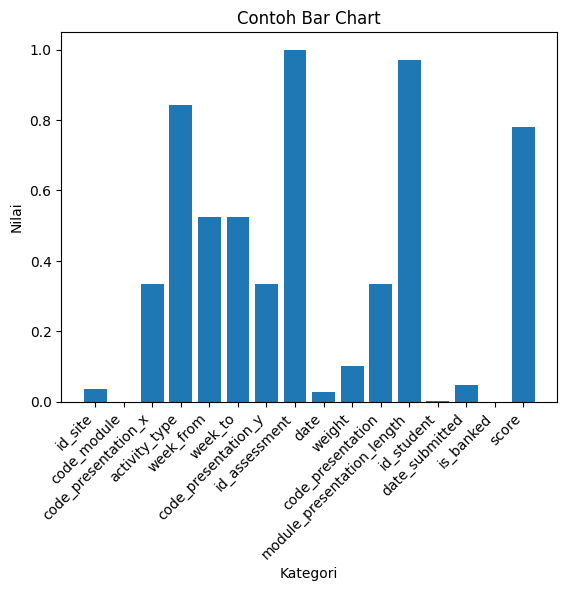

In [ ]:
# merged_data
kategori = ['id_site', 'code_module', 'code_presentation_x', 'activity_type', 'week_from', 'week_to', 'code_presentation_y', 'id_assessment', 'id_assessment', 'date', 'weight', 'code_presentation', 'module_presentation_length', 'id_student', 'date_submitted', 'is_banked', 'score' ]
nilai = [0.036688, 0.0, 0.333333, 0.842105, 0.524286, 0.524655, 0.333333, 0.0, 1.0, 0.028112, 0.1, 0.333333, 0.971429, 0.001811, 0.046850, 0.0, 0.78]

# Membuat bar chart
plt.bar(kategori, nilai)

# Menambahkan judul dan label sumbu
plt.title('Contoh Bar Chart')
plt.xlabel('Kategori')
plt.ylabel('Nilai')

# Mengatur jarak antara label-sumbu-x (kategori)
plt.xticks(rotation=45, ha='right')

# Menampilkan bar chart
plt.show()

Pie Charts

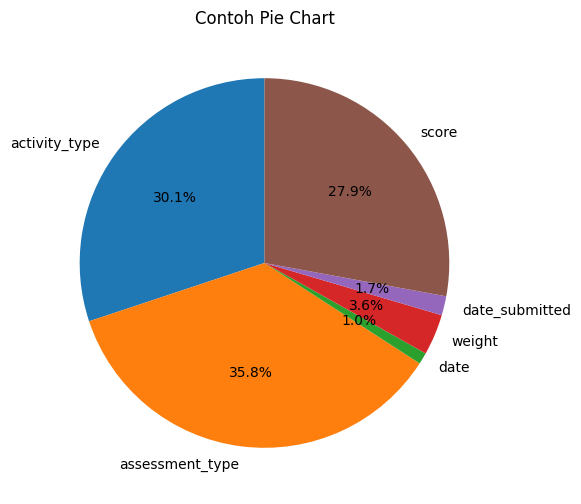

In [ ]:
# merged_data
kategori = ['activity_type', 'assessment_type', 'date', 'weight', 'date_submitted', 'score']
jumlah = [0.842105, 1.0, 0.028112, 0.1, 0.046850, 0.78]

# Membuat pie chart
plt.figure(figsize=(6, 6))  # Ukuran pie chart
plt.pie(jumlah, labels=kategori, autopct='%1.1f%%', startangle=90)  # Labels, persentase, dan sudut awal

# Menambahkan judul
plt.title('Contoh Pie Chart')


# Menampilkan pie chart
plt.show()

Scatter Plots

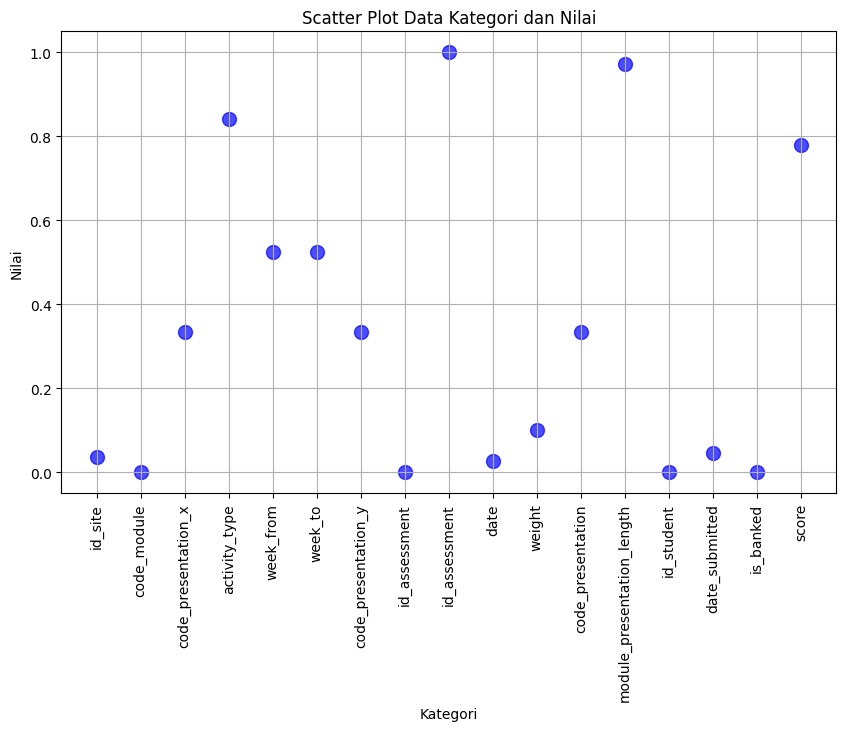

In [ ]:
# merged_data
kategori = ['id_site', 'code_module', 'code_presentation_x', 'activity_type', 'week_from', 'week_to', 'code_presentation_y', 'id_assessment', 'id_assessment', 'date', 'weight', 'code_presentation', 'module_presentation_length', 'id_student', 'date_submitted', 'is_banked', 'score']
nilai = [0.036688, 0.0, 0.333333, 0.842105, 0.524286, 0.524655, 0.333333, 0.0, 1.0, 0.028112, 0.1, 0.333333, 0.971429, 0.001811, 0.046850, 0.0, 0.78]

# Membuat angka unik untuk kategori
kategori_unik = range(len(kategori))

# Membuat scatter plot
plt.figure(figsize=(10, 6))  # Ukuran scatter plot
plt.scatter(kategori_unik, nilai, marker='o', s=100, c='blue', alpha=0.7)  # marker, ukuran, warna, dan transparansi

# Menambahkan label sumbu x
plt.xticks(kategori_unik, kategori, rotation=90)  # Label sumbu x sesuai kategori

# Menambahkan judul dan label sumbu
plt.title('Scatter Plot Data Kategori dan Nilai')
plt.xlabel('Kategori')
plt.ylabel('Nilai')

# Menampilkan scatter plot
plt.grid(True)
plt.show()

Histograms

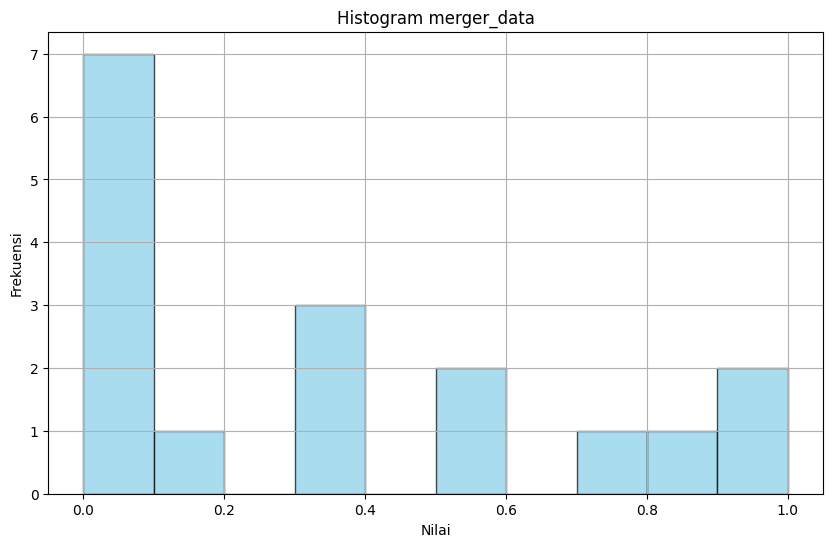

In [ ]:
# merged_data
nilai = [0.036688, 0.0, 0.333333, 0.842105, 0.524286, 0.524655, 0.333333, 0.0, 1.0, 0.028112, 0.1, 0.333333, 0.971429, 0.001811, 0.046850, 0.0, 0.78]

# Membuat histogram
plt.figure(figsize=(10, 6))  # Ukuran histogram
plt.hist(nilai, bins=10, color='skyblue', edgecolor='black', alpha=0.7)  # Jumlah bin, warna, dan transparansi

# Menambahkan judul dan label sumbu
plt.title('Histogram merger_data')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')

# Menampilkan histogram
plt.grid(True)
plt.show()

Line Charts

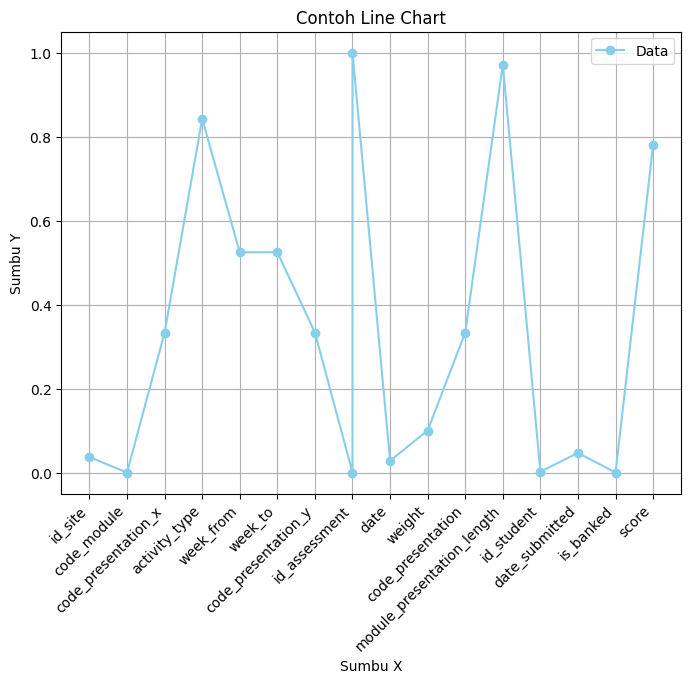

In [ ]:
# merged_data
x = ['id_site', 'code_module', 'code_presentation_x', 'activity_type', 'week_from', 'week_to', 'code_presentation_y', 'id_assessment', 'id_assessment', 'date', 'weight', 'code_presentation', 'module_presentation_length', 'id_student', 'date_submitted', 'is_banked', 'score']
y = [0.036688, 0.0, 0.333333, 0.842105, 0.524286, 0.524655, 0.333333, 0.0, 1.0, 0.028112, 0.1, 0.333333, 0.971429, 0.001811, 0.046850, 0.0, 0.78]

# Membuat line chart
plt.figure(figsize=(8, 6))  # Ukuran line chart
plt.plot(x, y, marker='o', linestyle='-', color='skyblue', label='Data')  # Marker, garis, warna, dan label

# Menambahkan judul dan label sumbu
plt.title('Contoh Line Chart')
plt.xlabel('Sumbu X')
plt.ylabel('Sumbu Y')

# Mengatur jarak antara label-sumbu-x (kategori)
plt.xticks(rotation=45, ha='right')

# Menambahkan grid
plt.grid(True)

# Menambahkan legenda
plt.legend()

# Menampilkan line chart
plt.show()

Box Plots

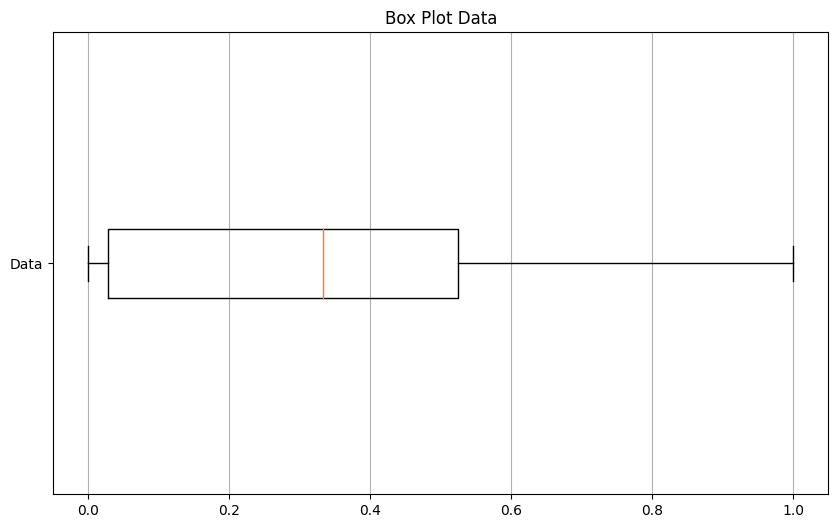

In [ ]:
# merged_data
x = ['id_site', 'code_module', 'code_presentation_x', 'activity_type', 'week_from', 'week_to', 'code_presentation_y', 'id_assessment', 'id_assessment', 'date', 'weight', 'code_presentation', 'module_presentation_length', 'id_student', 'date_submitted', 'is_banked', 'score']
y = [0.036688, 0.0, 0.333333, 0.842105, 0.524286, 0.524655, 0.333333, 0.0, 1.0, 0.028112, 0.1, 0.333333, 0.971429, 0.001811, 0.046850, 0.0, 0.78]

# Membuat box plot
plt.figure(figsize=(10, 6))  # Ukuran box plot
plt.boxplot(y, vert=False)  # Data dan orientasi

# Menambahkan label pada sumbu y
plt.yticks([1], ['Data'])

# Menambahkan judul
plt.title('Box Plot Data')

# Menampilkan box plot
plt.grid(axis='x')
plt.show()

Diagram Radar

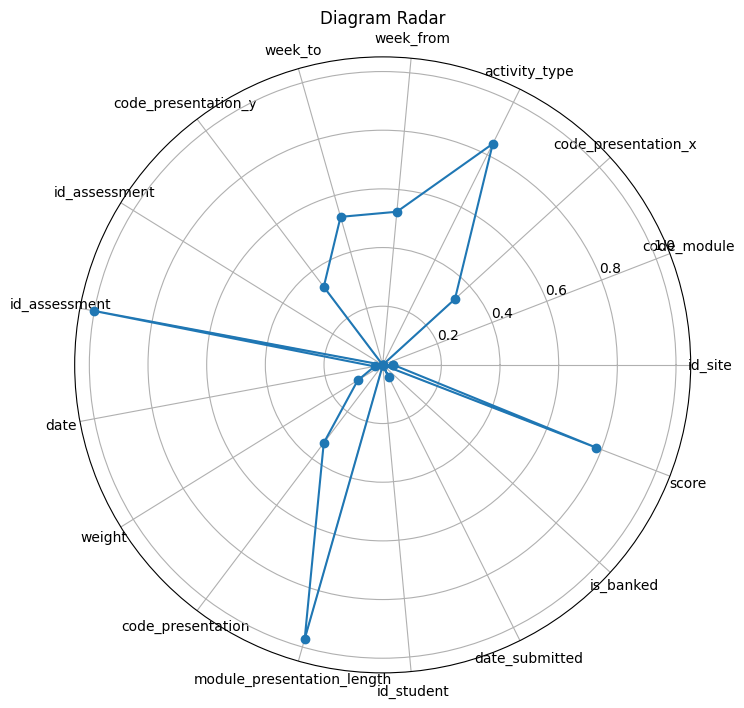

In [ ]:
# merged_data
kategori = ['id_site', 'code_module', 'code_presentation_x', 'activity_type', 'week_from', 'week_to', 'code_presentation_y', 'id_assessment', 'id_assessment', 'date', 'weight', 'code_presentation', 'module_presentation_length', 'id_student', 'date_submitted', 'is_banked', 'score']
nilai = [0.036688, 0.0, 0.333333, 0.842105, 0.524286, 0.524655, 0.333333, 0.0, 1.0, 0.028112, 0.1, 0.333333, 0.971429, 0.001811, 0.046850, 0.0, 0.78]

# Jumlah kategori
jumlah_kategori = len(kategori)

# Membuat sudut untuk setiap kategori
sudut = np.linspace(0, 2*np.pi, jumlah_kategori, endpoint=False)

# Menambahkan nilai pertama sebagai nilai terakhir agar grafik terhubung sempurna
nilai = np.append(nilai, nilai[0])

# Menambahkan nilai pertama sebagai nilai terakhir dalam sudut
sudut = np.append(sudut, sudut[0])

# Membuat diagram radar
plt.figure(figsize=(8, 8))
plt.polar(sudut, nilai, marker='o')

# Menambahkan judul
plt.title('Diagram Radar')

# Menampilkan kategori pada setiap sudut
plt.xticks(sudut[:-1], kategori)

# Menampilkan diagram radar
plt.show()
